In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd

In [2]:
#Load the train and test data
x_train = np.loadtxt("train_data.txt", delimiter=" ", unpack=False, usecols=[0,1])
y_train = np.loadtxt("train_data.txt", delimiter=" ", unpack=False, usecols=[2])
x_test = np.loadtxt("test_data.txt", delimiter=" ", unpack=False, usecols=[0,1])
y_test = np.loadtxt("test_data.txt", delimiter=" ", unpack=False, usecols=[2])

# Question 3 [60 points]: Linear Classifier Implementations 

a) [35 points: 15 points for each model, 5 points for evaluation] Using the provided dataset in the notebook, implement the perceptron and linear discriminant analysis (LDA) algorithms (use NumPy, Pandas) to classify the dataset. Then, report the accuracy of trained models. 

In [3]:
class Perceptron:
  
    def __init__ (self):
        self.w = None
        self.threshold = None
    
    def model(self, x):
        #Return 1 if (w*x) greater than or equal to threshold - Else return 0.
        result = 1 if (np.dot(self.w, x) >= self.threshold) else 0

        return result
  
    def predict(self, X):
        Y = []
        #Predict values for the input X using the 'model' function above and store it in Y
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y, epochs = 1, lr = 1):

        self.w = np.ones(X.shape[1])
        self.threshold = 0

        accuracy = {}
        max_accuracy = 0
        wt_matrix = []

        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)

                if y == 1 and y_pred == 0:
                    #Update the w and threshold
                    self.w = self.w + lr * x
                    self.threshold = self.threshold - lr * 1
      
                elif y == 0 and y_pred == 1:
                    self.w = self.w - lr * x
                    self.threshold = self.threshold + lr * 1
       
          
            wt_matrix.append(self.w)    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.threshold
        #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.threshold = chkptb
        
        print(max_accuracy)
        #plot the accuracy values over epochs
        plt.plot(accuracy.values())
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()
    
        #return the weight matrix, that contains weights over all epochs
        return np.array(wt_matrix)

0.664


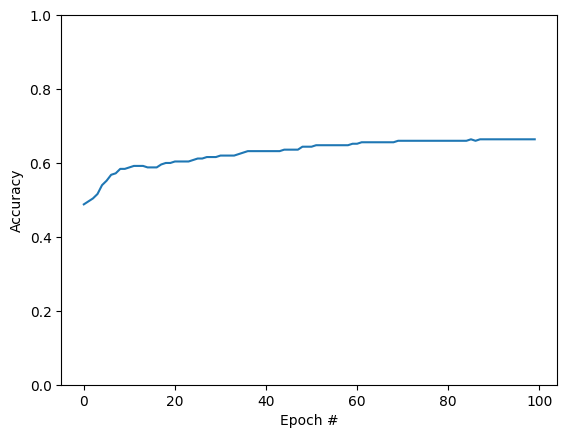

In [4]:
perceptron = Perceptron()

wt_matrix = perceptron.fit(x_train, y_train, 100, 0.001)

In [5]:
#Report the test accuracy for Perceptron. 
y_pred = perceptron.predict(x_test)

print(accuracy_score(y_pred, y_test))

0.6507936507936508


In [6]:
import numpy as np

class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        # define no. of features and class labels
        n_features = X.shape[1]
        labels = np.unique(y)
        
        # dimensionality check
        if self.n_components > len(labels):
            print("Too large no. dimensions")
        
        mu = np.mean(X, axis=0)
        
        # within class matrix
        wcm = np.zeros((n_features, n_features))
        # between class matrix
        bcm = np.zeros((n_features, n_features))
        
        for i in labels:
            X_i = X[y == i]
            mean_i = np.mean(X_i, axis=0)
            wcm += (X_i - mean_i).T.dot((X_i - mean_i))

            n_i = X_i.shape[0]
            mean_diff = (mean_i - mu).reshape(n_features, 1)
            bcm += n_i * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(wcm).dot(bcm)

        eig_val, eig_vec = np.linalg.eig(A)
        
        eig_vec = eig_vec.T
        idx = np.argsort(abs(eig_val))[::-1]
        eig_val = eig_val[idx]
        eig_vec = eig_vec[idx]
        
        self.linear_discriminants = eig_vec[0:self.n_components]
  

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

b)	[5 points] Use the provided test dataset, general and evaluate the models. 

### Perceptron model

In [7]:
y_pred_perceptron = perceptron.predict(x_test)

In [8]:
# Get class labels
y_pred_perceptron

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [9]:
# Accuracy of perceptron model without sklearn.linear_model.Perceptron
print(accuracy_score(y_pred_perceptron, y_test))

0.6507936507936508


### LDA

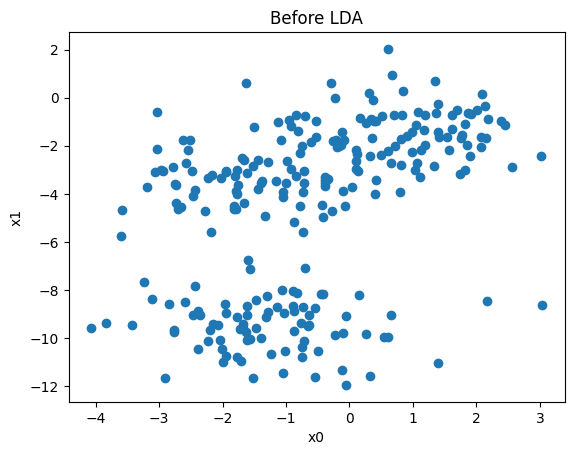

In [10]:
# How training data is scattered before applying LDA
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Before LDA")
plt.scatter(x_train[:,0], x_train[:,1])

In [11]:
# Apply LDA, find the principal components
lda = LDA(2)
lda.fit(x_train, y_train)

x_transformed = lda.transform(x_train)

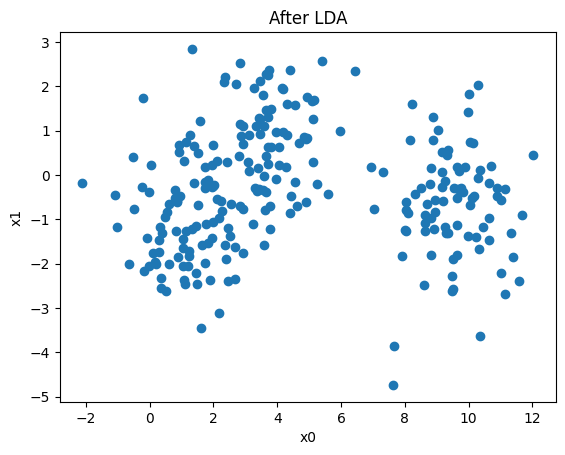

In [12]:
# Plot the data after LDA
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("After LDA")
plt.scatter(x_transformed[:, 0], x_transformed[:, 1])

c)	[15 pts] Implement models (perceptron, LDA, and logistic regression) using Scikit-learn. 

In [13]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
perceptron_sk = Perceptron()
lr_sk = LogisticRegression()
lda_sk = LinearDiscriminantAnalysis(n_components=2)

In [15]:
perceptron_sk.fit(x_train, y_train)
lr_sk.fit(x_train, y_train)
lda_sk.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

### Perceptron sklearn

In [16]:
y_pred_perceptron_sk = perceptron_sk.predict(x_test)

In [17]:
print(accuracy_score(y_pred_perceptron_sk, y_test))

0.873015873015873


### LDA sklearn

In [18]:
x_transform_sk = lda_sk.transform(x_train)

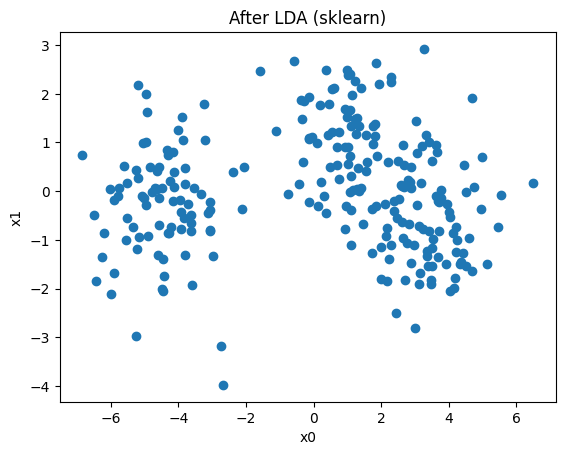

In [19]:
# Plot the points after LDA using sklearn
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("After LDA (sklearn)")
plt.scatter(x_transform_sk[:, 0], x_transform_sk[:, 1])

### Logistic Regression sklearn

In [20]:
y_pred_lr_sk = lr_sk.predict(x_test)

In [21]:
print(accuracy_score(y_pred_lr_sk, y_test))

0.9206349206349206


d)	[5 points] Compare the weights obtained and the accuracies of trained models. Did you expect weights to be the same? Explain why or why not? 

In [22]:
# Accuracy
# y_pred_perceptron is the y_pred for perceptron without sklearn
print("Accuracy of perceptron without sklearn:", accuracy_score(y_pred_perceptron, y_test))

# y_pred_perceptron_sk is the y_pred for perceptron without sklearn
print("Accuracy of perceptron with sklearn:", accuracy_score(y_pred_perceptron_sk, y_test))

Accuracy of perceptron without sklearn: 0.6507936507936508
Accuracy of perceptron with sklearn: 0.873015873015873


For weights, the model created without sklearn has a function that returns the weight matrix and we can see how the weight is different for different data points. However, when using sklearn, the weights are automatically assumed to be 1 and there is no built in function that corressponds to printing the weight matrix. 

The model is far better accurate to predict the class using sklearn (87.3%) than without (65%). This is due to the fact that the weight change in perceptron model using sklearn is according to Stochastic Gradient Descent.

# Question 4 [20 points]: Linear Regression and regularization

Suppose we decided to reject the linear model for the housing dataset discussed in linear regression lecture (the second model with all features after the preprocessing). Then, we are going to implement a new model that is less complex (lower number of features) and outperform (lower RMSE). 

a)	[10 points] Retrain the dataset. In the new trained dataset, same feature engineering for the continuous features is not allowed while the discrete features may be used as they are. For each process, explain explicitly the reason of work. 

In [23]:
# Original dataset from Week 2
# Since second model has been rejected
# Comparing the original dataset RMSE with some changes
df = pd.read_csv("Housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [24]:
# filling missing values before running without any changes
# Linear Regression cannot deal with NaN values
df_ = df
df_=df_['total_bedrooms'].fillna(value=df_['total_bedrooms'].mean())
df["total_bedrooms"] = df_

# also get dummies for discrete values
# Linear Regression cannot deal with str
y = pd.get_dummies(df.ocean_proximity)
df = pd.concat([df, y], axis=1)

# removing ocean_proximity column
df = df.drop(['ocean_proximity'], axis=1)

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [26]:
# Running Linear Regression with all features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

y_raw = df["median_house_value"]
features = list(set(df.columns.tolist())-set(['median_house_value']))
print(features)
X_raw = df[features]

scaler = StandardScaler()
data = scaler.fit_transform(X_raw)
X_raw = pd.DataFrame(data)

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=31)

['longitude', 'ISLAND', '<1H OCEAN', 'NEAR BAY', 'INLAND', 'housing_median_age', 'median_income', 'total_bedrooms', 'households', 'population', 'NEAR OCEAN', 'latitude', 'total_rooms']


In [27]:
lr_raw = LinearRegression()
lr_raw.fit(X_raw, y_raw)

# Train
y_train_pred = lr_raw.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rsq = r2_score(y_train, y_train_pred)
print(f'train: rmse={rmse}, mae={mae}, R^2={rsq}')
r_train_o = rmse

# Test
y_test_pred = lr_raw.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rsq = r2_score(y_test, y_test_pred)
print(f'train: rmse={rmse}, mae={mae}, R^2={rsq}')
r_test_o = rmse

train: rmse=4713809018.37044, mae=49900.87336491989, R^2=0.6461130429135137
train: rmse=4736720234.926972, mae=49634.54026006353, R^2=0.6439661437861258


We see that the RMSE value is very high. This is obvious since we are using all the attributes for fitting the Linear Regression model. We can use scaling to get a small value but since it will be a scaled down value, we will have to scale our modified data as well. 

In [28]:
df = pd.read_csv("Housing.csv")
# remove NaN variables
df_ = df.drop('total_bedrooms',axis=1)
df = df.dropna()

# also get dummies for discrete values
# Linear Regression cannot deal with str
y = pd.get_dummies(df.ocean_proximity)
df = pd.concat([df, y], axis=1)

# removing ocean_proximity column
df = df.drop(['ocean_proximity'], axis=1)

In [29]:
# Check correlation of dataframe
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


We want to see the correlation of the values to our target "median_house_value". Any correlation greatly towards -1 or +1 will show us negative or positive correlation respectively.

We can see there are many attributes with correlation to "median_house_value" close to zero which tells us that there is almost no correlation between them. Thus, we can remove those columns.

But here is the catch, there is almost no correlation between the house price and the total bedrooms it has. That is a bit strange as the price of the house will likely be related to the no. of rooms it has. The same goes for price of house with households. 

In order to use these correlations, we have to merge some columns to get us some new information and then we can come back to see if they make any difference.

In [30]:
# add informative columns
df['bedroom_per_room'] = df['total_bedrooms']/df['total_rooms']
df['bedrooms_per_household'] = df['total_bedrooms']/df['households']
df['total_rooms_per_household'] = df['total_rooms']/df['households']

In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_per_room,bedrooms_per_household,total_rooms_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0,0.146591,1.023810,6.984127
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0,0.155797,0.971880,6.238137
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0,0.129516,1.073446,8.288136
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0,0.184458,1.073059,5.817352
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0,0.172096,1.081081,6.281853


In [32]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_per_room,bedrooms_per_household,total_rooms_per_household
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185,0.092657,0.013402,-0.027307
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342,-0.113815,0.070025,0.106423
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797,0.136089,-0.077918,-0.153031
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674,-0.187900,0.029373,0.133482
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679,0.084238,0.045887,0.001538
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498,0.035319,-0.066510,-0.071898
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106,0.065087,-0.055158,-0.080165
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351,-0.615661,-0.062299,0.325307
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378,-0.255880,-0.046739,0.151344
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018,0.078247,-0.088498,-0.099790


We can now see that house price is correlated with bedroom per room and total rooms per household. Thus, we keep these columns and discard the others.

In [33]:
# Discard columns with low correlation
df = df.drop(['longitude', 'latitude', 'population', 'households'], axis=1)

In [34]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_per_room,bedrooms_per_household,total_rooms_per_household
0,41,880,129.0,8.3252,452600,0,0,0,1,0,0.146591,1.023810,6.984127
1,21,7099,1106.0,8.3014,358500,0,0,0,1,0,0.155797,0.971880,6.238137
2,52,1467,190.0,7.2574,352100,0,0,0,1,0,0.129516,1.073446,8.288136
3,52,1274,235.0,5.6431,341300,0,0,0,1,0,0.184458,1.073059,5.817352
4,52,1627,280.0,3.8462,342200,0,0,0,1,0,0.172096,1.081081,6.281853


Lets apply Linear Regression again

In [35]:
y_new = df["median_house_value"]
features = list(set(df.columns.tolist())-set(['median_house_value']))
print(features)
X_new = df[features]

scaler = StandardScaler()
data = scaler.fit_transform(X_new)
X_new = pd.DataFrame(data)


X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=31)

lr_new = LinearRegression()
lr_new.fit(X_new, y_new)

# Train
y_train_pred = lr_new.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rsq = r2_score(y_train, y_train_pred)
print(f'train: rmse={rmse}, mae={mae}, R^2={rsq}')
r_train_n = rmse

# Test
y_test_pred = lr_new.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rsq = r2_score(y_test, y_test_pred)
print(f'test: rmse={rmse}, mae={mae}, R^2={rsq}')
r_test_n = rmse

['bedrooms_per_household', 'total_rooms_per_household', 'ISLAND', '<1H OCEAN', 'INLAND', 'housing_median_age', 'median_income', 'total_bedrooms', 'NEAR BAY', 'bedroom_per_room', 'NEAR OCEAN', 'total_rooms']
train: rmse=5119407131.39905, mae=51731.172742875664, R^2=0.6165396401694224
test: rmse=4994137041.091481, mae=51206.0269496157, R^2=0.6233979909518212


We see that our RMSE score has been increased. This shows that we deleted too much of information. Let's see what how much is the difference.

In [36]:
change_train = (r_train_n - r_train_o) / r_train_o
change_test = (r_test_n - r_test_o) / r_test_o

print("RMSE change in train:", change_train)
print("RMSE change in test:", change_test)

RMSE change in train: 0.08604466397512753
RMSE change in test: 0.054344946164733225


We see that our new RMSE has increased by about 8% in training and about 5% in test.

b)	[10 points] Suppose the worst scenario is when the RMSE of new model is higher but within 5% with the same number of features that the original model had. Train five different models (with or without regularizations) and report the results. Select the best model among five models and explain why. 

In [37]:
from sklearn.linear_model import Ridge, Lasso, Lars, ElasticNet, SGDRegressor

In [38]:
# Training in the model which has higher RMSE than original

# Ridge
ridge = Ridge()
ridge.fit(X_new, y_new)

# Train
y_train_pred = ridge.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rsq = r2_score(y_train, y_train_pred)
print(f'RIDGE train: rmse={rmse}, mae={mae}, R^2={rsq}')
# Test
y_test_pred = ridge.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rsq = r2_score(y_test, y_test_pred)
print(f'RIDGE test: rmse={rmse}, mae={mae}, R^2={rsq}')

RIDGE train: rmse=5116119833.253074, mae=51777.74550806765, R^2=0.6167858695662201
RIDGE test: rmse=4991074231.138187, mae=51253.24005718716, R^2=0.62362895385337


In [39]:
# Lasso
lasso = Lasso()
lasso.fit(X_new, y_new)

# Train
y_train_pred = lasso.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rsq = r2_score(y_train, y_train_pred)
print(f'LASSO train: rmse={rmse}, mae={mae}, R^2={rsq}')
# Test
y_test_pred = lasso.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rsq = r2_score(y_test, y_test_pred)
print(f'LASSO test: rmse={rmse}, mae={mae}, R^2={rsq}')

LASSO train: rmse=5116131592.8885765, mae=51777.60115666304, R^2=0.6167849887310091
LASSO test: rmse=4991046829.493848, mae=51252.869178993154, R^2=0.6236310201791886


c:\users\alexr\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.305e+12, tolerance: 2.723e+10
  model = cd_fast.enet_coordinate_descent(


In [40]:
# Lars
lars = Lars()
lars.fit(X_new, y_new)

# Train
y_train_pred = lars.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rsq = r2_score(y_train, y_train_pred)
print(f'LARS train: rmse={rmse}, mae={mae}, R^2={rsq}')
# Test
y_test_pred = lars.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rsq = r2_score(y_test, y_test_pred)
print(f'LARS test: rmse={rmse}, mae={mae}, R^2={rsq}')

LARS train: rmse=5398534253.057731, mae=52633.65928867929, R^2=0.5956321046360138
LARS test: rmse=5219622433.293189, mae=52040.074008392454, R^2=0.6063944023407204


c:\users\alexr\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\users\alexr\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_least_angle.py:649: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=2.896e+00, with an active set of 11 regressors, and the smallest cholesky piv

In [41]:
# Elastic net
en = ElasticNet()
en.fit(X_new, y_new)

# Train
y_train_pred = en.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rsq = r2_score(y_train, y_train_pred)
print(f'ELASTIC NET train: rmse={rmse}, mae={mae}, R^2={rsq}')
# Test
y_test_pred = en.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rsq = r2_score(y_test, y_test_pred)
print(f'ELASTIC NET test: rmse={rmse}, mae={mae}, R^2={rsq}')

ELASTIC NET train: rmse=5972932014.69934, mae=57797.31090062721, R^2=0.5526078311778533
ELASTIC NET test: rmse=5945321599.845284, mae=57894.32220306218, R^2=0.5516702804675293


In [42]:
# SGD regressor
sgd = SGDRegressor()
sgd.fit(X_new, y_new)

# Train
y_train_pred = sgd.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
rsq = r2_score(y_train, y_train_pred)
print(f'SGD train: rmse={rmse}, mae={mae}, R^2={rsq}')
# Test
y_test_pred = sgd.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rsq = r2_score(y_test, y_test_pred)
print(f'SGD test: rmse={rmse}, mae={mae}, R^2={rsq}')

SGD train: rmse=2.813534165933916e+20, mae=965759017.3140832, R^2=-21074292313.973663
SGD test: rmse=1.6458813853681205e+20, mae=814120795.4003799, R^2=-12411398230.258108


According to the 5 taken models, the Ridge regression works the best due to the fact that it uses L2 Regularization. It is better than Lasso regularization because L1 shrinks the coefficients down to zero as opposed to spreading evenly on L2.

The model can perform better with more normalization and careful selection of which columns to drop and with further optimizations.